# Importing libraries

In [ ]:
!pip install rpy2==2.9.6b

     |████████████████████████████████| 194kB 7.1MB/s eta 0:00:01
  Created wheel for rpy2: filename=rpy2-2.9.6b0-cp36-cp36m-linux_x86_64.whl size=316071 sha256=aabe73bde01339e23ebea953b263719b3a30b6592874611b9a0358bf91e8edb2
  Stored in directory: /root/.cache/pip/wheels/02/d6/dc/8c3faafb8cb7165a30d67f899ff7e88766e20260dda41ace88
Successfully built rpy2
  Found existing installation: rpy2 3.2.7
    Uninstalling rpy2-3.2.7:
      Successfully uninstalled rpy2-3.2.7


In [ ]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5MB 6.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [ ]:
%%R
install.packages("grf")

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependencies ‘zoo’, ‘DiceKriging’, ‘lmtest’, ‘sandwich’, ‘RcppEigen’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/zoo_1.8-8.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 849487 bytes (829 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:1

In [ ]:
!pip install justcause==0.3.2

     |████████████████████████████████| 50 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 236 kB 8.5 MB/s 
     |████████████████████████████████| 1.8 MB 33.6 MB/s 
     |████████████████████████████████| 326 kB 58.9 MB/s 
  Created wheel for causalml: filename=causalml-0.9.0-cp36-cp36m-linux_x86_64.whl size=482241 sha256=171e4352686ebc8e7a2267513329b8d533e9d30a58d72f0817425df67c013f90
  Stored in directory: /root/.cache/pip/wheels/76/a6/03/2b84df7887db775e47e4079749cad2f1733812ac49e7d57279
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463946 sha256=4eb970db2109e263288698cffdd019dfc6efaca8e413a824f3ddc07a6ddfdcff
  Stored in directory: /root/.cache/pip/wheels/9f/f0/81/55d1fce3ccceacb520abc45e88f3d2de2959cd079f712b5f85
Successfully built causalml shap


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
from justcause.data import Col
from justcause.data.sets import load_ihdp
from justcause.metrics import pehe_score, mean_absolute
from justcause.evaluation import calc_scores, summarize_scores

In [ ]:
%load_ext autoreload

%autoreload 2

# Loading all required packages 
import itertools
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Infant Health Development Program Data-Set used in this exercise

- Original study constructed to study the effect of special child care for low birthweight, premature infants.
- In total, six continuous and 19 binary pretreatment variables
- Using the covariates of all instances in both treatment groups, the potential outcomes are generated synthetically
- Finally, manipulation of observational study by omitting a non-random set of samples from the treatment group.
- The way the subset is generated from the experimental data does not ensure complete overlap - latent confounder
- Specifically, the observational subset is created by throwing away the set of all children with nonwhite mothers from the treatment group
- Following data generation process used for potentia outcomes
- After the adaptions from Hill, we are left with 139 instances in the treated group and 608 instances in the control group.

# 1. Running the causal models

In [ ]:
# We Import the IHDP data-set 
# There are 1000 replications in this data-set, each with a different individual treament effect
# produced from an underlying generative function. 
# Check out https://justcause.readthedocs.io/en/latest/


# We load 100 of the 1000 data-sets
replications = load_ihdp(select_rep=np.arange(100))

In [ ]:
# Defining global parameters
train_size = 0.8        # Size of the training data-set 
random_state = 42        # Setting the random state

n = 0       # number of the data-sets we look at 

metrics = [pehe_score, mean_absolute]    ## Defining the metrics that will be calculated below

## 1.1 S-Learner Linear Regression

In [ ]:
# Importing the relevant SLearner module

from justcause.learners import SLearner


# Defining the S-Learner function that returns the ITE
# We define a function that takes the data, splits it up and returns individual treatment effect accuracies for the train and the test data-set
# The function takes each, the train and test data separately and selects the relevant variables and coverts them into np arrays
# The relevant variables have the followings names: x (the covariates), t (the treatment), y (the outcome)
# Note that the treatment needs to be explicitly defined



def basic_slearner(train, test, model):
    """ """
    train_X, train_t, train_y = train.np.X, train.np.t, train.np.y
    test_X, test_t, test_y = test.np.X, test.np.t, test.np.y

    slearner = model     # Select linear regression as a method to find the ITE for the S-Learner
    slearner.fit(train_X, train_t, train_y)      # Fitting the s-learner with linear regression
    return (
        slearner.predict_ite(train_X, train_t, train_y),   # Returning the predicting values for ITE for train
        slearner.predict_ite(test_X, test_t, test_y)       # Returning the prediction values for ITE for test
    )



In [ ]:
results_df = list()     # We define the list that contains the results
test_scores = list()    # Storing the test scores in a list
train_scores = list()   # Storing the train scores in a list


# Here we define the model that is going to be used for the S-learner
# Please instantiate linear regression for the simple learner


##-----------------Question------------------###
# Pass a LinearRegression Model into the S-Learner
# No particular parameter-settings necessary

## Creating a object of linear regression. We need to create an instance of each model  ##
linear = LinearRegression()

# pass the linear model
model=SLearner(linear)

for rep in replications:

    train, test = train_test_split(
        rep, train_size=train_size, random_state=random_state
    )

    # REPLACE this with the function you implemented and want to evaluate
    train_ite, test_ite = basic_slearner(train, test, model)

    # Calculate the scores and append them to a dataframe
    train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))
    test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)
train_result.update({'method': 'S-Learner LR', 'train': True})
test_result.update({'method': 'S-Learner LR', 'train': False})

In [ ]:
df_S_learner_LR=pd.DataFrame([train_result, test_result])
df_S_learner_LR

,pehe_score-mean,pehe_score-median,pehe_score-std,mean_absolute-mean,mean_absolute-median,mean_absolute-std,method,train
0,0.891075,0.891075,0.0,0.035169,0.035169,0.0,S-Learner LR,True
1,0.723163,0.723163,0.0,0.048408,0.048408,0.0,S-Learner LR,False


### 1.1.1 S-Learner Visualization

In [ ]:
# We run the same analysis again but only on an indvidual run of the data
# The reason is that the data generating process is varied every time,... 
# ...so we can only look at individual runs of the ITE effect
results_df = list()    # We define the list that contains the results
test_scores = list()   # Storing the test scores in a list
train_scores = list()  # Storing the train scores in a list


#for rep in replications:

train, test = train_test_split(
        replications[n], train_size=train_size, random_state=random_state     # Use train_test_split  to split the data-set (replications[n]) 
    )

# REPLACE this with the function you implemented and want to evaluate
train_ite, test_ite = basic_slearner(train, test, model)         # using the pre-defined basic learner function to return train, test

# Calculate the scores and append them to a dataframe
train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))    # Using the just cause API to calcualte the scores from the estimate ITE for the training data
test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))     # Using the just cause API to calcualte the scores from the estimate ITE for the test data

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)   #summary of the scores 
train_result.update({'method': 'S-Learner LR', 'train': True})
test_result.update({'method': 'S-Learner LR', 'train': False})


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


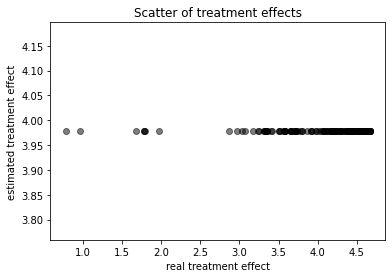

In [ ]:
# Importing Matplotlib 
import matplotlib.pyplot as plt
colors = (0,0,0)
# Plot
plt.scatter(test.np.ite, test_ite,  c=colors, alpha=0.5)
plt.title('Scatter of treatment effects')
plt.xlabel('real treatment effect')
plt.ylabel('estimated treatment effect')
plt.show()

# If the treatment effect is perfectly represented there should be a 45 degree line!

## QUESTION 1

IS THE S-LEARNER WITH LINEAR REGRESSION ESTIMATING INDIVIDUAL TREATMENT EFFECTS WELL? IF YES/NO -WHY SO?



<div class="alert alert-block alert-warning">

**'NO'** the S-LEARNER with linear regression is not estimating well with individual treatments as we can clearly see there is no direct linear relationship between them.

*Why so?*

Here is the reason:

"The linear regression doesn't captures **'heterogenous treatment effect'** as it is heavily dependent on the feature"

</div>

## 1.2 Propensity Score Weighing with Linear Regression

In [ ]:
# Importing the relevant PSWEstimator

from justcause.learners import PSWEstimator


#Defining the Propoensity Score weighing function that returns the ITE

def propensity_score_weighing(train, test, model):
    """ """
    train_X, train_t, train_y = train.np.X, train.np.t, train.np.y
    test_X, test_t, test_y = test.np.X, test.np.t, test.np.y

    pswestimator = model

    return (
        pswestimator.estimate_ate(train_X, train_t, train_y),
        pswestimator.estimate_ate(test_X, test_t, test_y)
    )


In [ ]:
results_df = list()
test_scores = list()
train_scores = list()




model = PSWEstimator(propensity_learner=None, delta=0.001)


for rep in replications:

    train, test = train_test_split(
        rep, train_size=train_size, random_state=random_state
    )

    # REPLACE this with the function you implemented and want to evaluate
    train_ite, test_ite = propensity_score_weighing(train, test, model)

    # Calculate the scores and append them to a dataframe
    train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))
    test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)
train_result.update({'method': 'PSW', 'train': True})
test_result.update({'method': 'PSW', 'train': False})

In [ ]:
df_PSW_LR=pd.DataFrame([train_result, test_result])
df_PSW_LR

,pehe_score-mean,pehe_score-median,pehe_score-std,mean_absolute-mean,mean_absolute-median,mean_absolute-std,method,train
0,5.595322,2.537818,8.244302,0.412006,0.284332,0.457697,PSW,True
1,6.837997,3.484394,8.323623,3.783440,2.649187,3.225824,PSW,False


## 1.3 S-Learner Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


# Importing the relevant S-Learner estimator
from justcause.learners import SLearner


#Defining the S-Learner function that returns the ITE

def basic_slearner(train, test, model):
    """ """
    train_X, train_t, train_y = train.np.X, train.np.t, train.np.y
    test_X, test_t, test_y = test.np.X, test.np.t, test.np.y

    slearner = model  
    slearner.fit(train_X, train_t, train_y)
    return (
        slearner.predict_ite(train_X, train_t, train_y),
        slearner.predict_ite(test_X, test_t, test_y)
    )


In [ ]:
results_df = list()
test_scores = list()
train_scores = list()

#---------------------------Question--------------------------------#
# Pass a RandomForestRegressor into the S-learner

# Making instance of the 'RandomForestRgressor' class"
rf = RandomForestRegressor()

model = SLearner(rf)

for rep in replications:

    train, test = train_test_split(
        rep, train_size=train_size, random_state=random_state
    )

    # REPLACE this with the function you implemented and want to evaluate
    train_ite, test_ite = basic_slearner(train, test, model )

    # Calculate the scores and append them to a dataframe
    train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))
    test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)
train_result.update({'method': 'S-Learner RF', 'train': True})
test_result.update({'method': 'S-Learner RF', 'train': False})

In [ ]:
df_S_learner_RF=pd.DataFrame([train_result, test_result])
df_S_learner_RF

,pehe_score-mean,pehe_score-median,pehe_score-std,mean_absolute-mean,mean_absolute-median,mean_absolute-std,method,train
0,3.120911,1.038537,4.849793,0.509454,0.122667,0.961678,S-Learner RF,True
1,3.306203,1.253123,5.149171,0.453604,0.125523,1.045012,S-Learner RF,False


### 1.3.1 Random Forest Visualization

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


# Importing the relevant SLearner module
from justcause.learners import SLearner


#Defining the S-Learner function that returns the ITE

def basic_slearner(train, test, model):
    """ """
    train_X, train_t, train_y = train.np.X, train.np.t, train.np.y
    test_X, test_t, test_y = test.np.X, test.np.t, test.np.y

    slearner = model
    slearner.fit(train_X, train_t, train_y)
    return (
        slearner.predict_ite(train_X, train_t, train_y),
        slearner.predict_ite(test_X, test_t, test_y)
    )

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


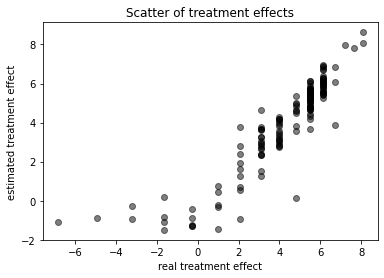

In [ ]:
import matplotlib.pyplot as plt
colors = (0,0,0)
# Plot
plt.scatter(test.np.ite, test_ite,  c=colors, alpha=0.5)
plt.title('Scatter of treatment effects')
plt.xlabel('real treatment effect')
plt.ylabel('estimated treatment effect')
plt.show()

## QUESTION 2

IS THE S-LEARNER WITH RANDOM FOREST ESTIMATING INDIVIDUAL TREATMENT EFFECTS WELL? IF YES/NO -WHY SO?



<div class="alert alert-block alert-warning">

**'YES'** the S-LEARNER with RandomForestRegressor is estimating well with individual treatments on individual treatment effect due to following causation:

- The random forest is showing a direct relatonship between real and estimated treatment effect.

- We somewhat get a **heterogeneous relationship** in this mapping


</div>

## 1.4 T-Learner Linear Regression

In [ ]:
# Importing the relevant SLearner module

from justcause.learners import TLearner


#Defining the S-Learner function that returns the ITE

def basic_tlearner(train, test, model):
    """ """
    train_X, train_t, train_y = train.np.X, train.np.t, train.np.y
    test_X, test_t, test_y = test.np.X, test.np.t, test.np.y

    tlearner = model
    tlearner.fit(train_X, train_t, train_y)
    return (
        tlearner.predict_ite(train_X, train_t, train_y),
        tlearner.predict_ite(test_X, test_t, test_y)
    )

In [ ]:
results_df = list()
test_scores = list()
train_scores = list()

#------------------Question------------------------------#
# Pass linear regression into the T-Learner

# Passing "linear" instance
linear = LinearRegression()
tlearner = TLearner(linear)

for rep in replications:

    train, test = train_test_split(
        rep, train_size=train_size, random_state=random_state
    )

    # REPLACE this with the function you implemented and want to evaluate
    train_ite, test_ite = basic_tlearner(train, test, model)

    # Calculate the scores and append them to a dataframe
    train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))
    test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)
train_result.update({'method': 'T-Learner LR', 'train': True})
test_result.update({'method': 'T-Learner LR', 'train': False})

In [ ]:
df_T_learner_LR=pd.DataFrame([train_result, test_result])
df_T_learner_LR

,pehe_score-mean,pehe_score-median,pehe_score-std,mean_absolute-mean,mean_absolute-median,mean_absolute-std,method,train
0,4.159059,1.910384,6.298658,0.455613,0.202166,0.761666,T-Learner LR,True
1,4.372969,1.805614,6.591175,0.683354,0.250850,1.274274,T-Learner LR,False


### 1.4.1 T-Learner Linear Regression Visualization

In [ ]:
results_df = list()
test_scores = list()
train_scores = list()

train, test = train_test_split(
        replications[n], train_size=train_size, random_state=random_state
    )

# REPLACE this with the function you implemented and want to evaluate
train_ite, test_ite = basic_tlearner(train, test, model)

# Calculate the scores and append them to a dataframe
train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))
test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)
train_result.update({'method': 'T-Learner LR', 'train': True})
test_result.update({'method': 'T-Learner LR', 'train': False})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


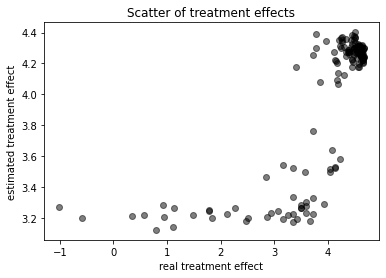

In [ ]:
import matplotlib.pyplot as plt
colors = (0,0,0)
# Plot
plt.scatter(test.np.ite, test_ite,  c=colors, alpha=0.5)
plt.title('Scatter of treatment effects')
plt.xlabel('real treatment effect')
plt.ylabel('estimated treatment effect')
plt.show()

## QUESTION 3

IS THE T-LEARNER WITH LINEAR REGRESSION ESTIMATING INDIVIDUAL TREATMENT EFFECTS WELL? IF YES/NO -WHY SO?

<div class="alert alert-block alert-warning">

**'NO'** the T-LEARNER with linear regression isn't estimating well with individual treatments on individual treatment effect due to the fact that real treatment is trained on treated instances and the estimated on control instances.

</div>

## 1.5 T-Learner Random Forest

In [ ]:
# Importing the relevant SLearner module

from justcause.learners import TLearner


#Defining the S-Learner function that returns the ITE

def basic_tlearner(train, test, model):
    """ """
    train_X, train_t, train_y = train.np.X, train.np.t, train.np.y
    test_X, test_t, test_y = test.np.X, test.np.t, test.np.y

    tlearner = model
    tlearner.fit(train_X, train_t, train_y)
    return (
        tlearner.predict_ite(train_X, train_t, train_y),
        tlearner.predict_ite(test_X, test_t, test_y)
    )



In [ ]:
results_df = list()
test_scores = list()
train_scores = list()

#--------------------Question----------------------------------#
# Pass a Random Forest into the T-Learner

# Passing the earlier 'rf' instance
rf = RandomForestRegressor()
model = TLearner(rf)

for rep in replications:

    train, test = train_test_split(
        rep, train_size=train_size, random_state=random_state
    )

    # REPLACE this with the function you implemented and want to evaluate
    train_ite, test_ite = basic_tlearner(train, test, model)

    # Calculate the scores and append them to a dataframe
    train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))
    test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)
train_result.update({'method': 'T-Learner RF', 'train': True})
test_result.update({'method': 'T-Learner RF', 'train': False})

In [ ]:
df_T_learner_RF=pd.DataFrame([train_result, test_result])
df_T_learner_RF

,pehe_score-mean,pehe_score-median,pehe_score-std,mean_absolute-mean,mean_absolute-median,mean_absolute-std,method,train
0,1.734244,0.950921,2.126502,0.128307,0.113694,0.108579,T-Learner RF,True
1,2.615614,1.111719,3.821031,0.230886,0.122041,0.397752,T-Learner RF,False


### 1.5.1 T-Learner with Random Forest Visualization

In [ ]:
results_df = list()
test_scores = list()
train_scores = list()


train, test = train_test_split(
        replications[n], train_size=train_size, random_state=random_state
    )

# REPLACE this with the function you implemented and want to evaluate
train_ite, test_ite = basic_tlearner(train, test, model)

# Calculate the scores and append them to a dataframe
train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))
test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)
train_result.update({'method': 'T-Learner RF', 'train': True})
test_result.update({'method': 'T-Learner RF', 'train': False})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


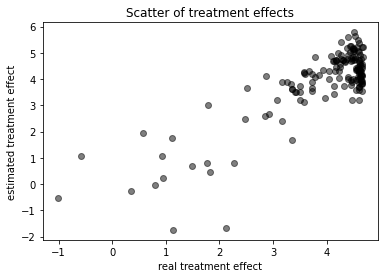

In [ ]:
import matplotlib.pyplot as plt
colors = (0,0,0)
# Plot
plt.scatter(test.np.ite, test_ite,  c=colors, alpha=0.5)
plt.title('Scatter of treatment effects')
plt.xlabel('real treatment effect')
plt.ylabel('estimated treatment effect')
plt.show()

## QUESTION 4

IS THE T-LEARNER WITH RANDOM FOREST ESTIMATING INDIVIDUAL TREATMENT EFFECTS WELL? IF YES/NO -WHY SO?

<div class="alert alert-block alert-warning">

- **YES** the T-LEARNER with random forest is estimating well with individual treatments on individual treatment effect.

- The mapping is even better than S-LEARNER method due to following reason that since we use different methods to estimate mean(µ1) and
mean(µ0) we adapt to the structure of the data if necessary.

- Here it takes into account nearby observations as well for better estimation



</div>

## 1.6 Causal Forest

In [ ]:
# Importing the relevant SLearner module

from justcause.learners import CausalForest


#Defining the S-Learner function that returns the ITE

def causal_forest(train, test, model):
    """ """
    train_X, train_t, train_y = train.np.X, train.np.t, train.np.y
    test_X, test_t, test_y = test.np.X, test.np.t, test.np.y

    causalforest = model
    causalforest.fit(train_X, train_t, train_y)
    return (
        causalforest.predict_ite(train_X, train_t, train_y),
        causalforest.predict_ite(test_X, test_t, test_y)
    )


In [ ]:
random_state = 1

results_df = list()
test_scores = list()
train_scores = list()

model = CausalForest(random_state=random_state)

for rep in replications:

    train, test = train_test_split(
        rep, train_size=train_size, random_state=random_state
    )

    # REPLACE this with the function you implemented and want to evaluate
    train_ite, test_ite = causal_forest(train, test, model)

    # Calculate the scores and append them to a dataframe
    train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))
    test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)
train_result.update({'method': 'T-Learner RF', 'train': True})
test_result.update({'method': 'T-Learner RF', 'train': False})

In [ ]:
df_causal_forest=pd.DataFrame([train_result, test_result])
df_causal_forest

,pehe_score-mean,pehe_score-median,pehe_score-std,mean_absolute-mean,mean_absolute-median,mean_absolute-std,method,train
0,4.148852,1.939224,6.273968,0.435427,0.202059,0.737229,T-Learner RF,True
1,4.360059,1.822446,6.550383,0.672660,0.249457,1.289471,T-Learner RF,False


### 1.6.1 Causal Forest Visualization 

In [ ]:
random_state = 1

results_df = list()
test_scores = list()
train_scores = list()



train, test = train_test_split(
        replications[n], train_size=train_size, random_state=random_state
    )

# REPLACE this with the function you implemented and want to evaluate
train_ite, test_ite = causal_forest(train, test, model)

# Calculate the scores and append them to a dataframe
train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))
test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)
train_result.update({'method': 'T-Learner RF', 'train': True})
test_result.update({'method': 'T-Learner RF', 'train': False})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


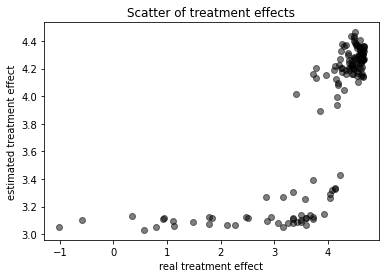

In [ ]:
import matplotlib.pyplot as plt
colors = (0,0,0)
# Plot
plt.scatter(test.np.ite, test_ite,  c=colors, alpha=0.5)
plt.title('Scatter of treatment effects')
plt.xlabel('real treatment effect')
plt.ylabel('estimated treatment effect')
plt.show()

## QUESTION 5

IS THE CAUSAL FOREST WITH LINEAR REGRESSION ESTIMATING INDIVIDUAL TREATMENT EFFECTS WELL? IF YES/NO -WHY SO?

<div class="alert alert-block alert-warning">

**'NO'** it's suprising the effect of causal forest is not perfroming well with ITE. The fundamental concept of minimising squared error loss is not working in this case which can be verified by the metric "pehe_score"

This can be due to following reasons:

- The data distribution is non-uniform due to existence of some perfect outliers which can be understood by error distribution and large difference between pehe_score-mean and pehe_score-median

- Causal forest takes into account "homogeneity" as a standard but here we don't notice any sufficient improvement due to it

- Linear regression as an estimator is not a right choice as a modelling parameter due to non-heterogeneity effect



</div>

## 1.7 Neural Network

In [ ]:
# Importing the relevant SLearner module

from justcause.learners import DragonNet


#Defining the S-Learner function that returns the ITE

def causal_forest(train, test, model):
    """ """
    train_X, train_t, train_y = train.np.X, train.np.t, train.np.y
    test_X, test_t, test_y = test.np.X, test.np.t, test.np.y

    dragonnet = model
    dragonnet.fit(train_X, train_t, train_y)
    return (
        dragonnet.predict_ite(train_X, train_t, train_y),
        dragonnet.predict_ite(test_X, test_t, test_y)
    )


In [ ]:
random_state = 1

results_df = list()
test_scores = list()
train_scores = list()


#---------------------------Question----------------------------#
# Set the model to the DragonNet neural network from JustCause

model = DragonNet()


for rep in replications:

    train, test = train_test_split(
        rep, train_size=train_size, random_state=random_state
    )

    # REPLACE this with the function you implemented and want to evaluate
    train_ite, test_ite = causal_forest(train, test, model)

    # Calculate the scores and append them to a dataframe
    train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))
    test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)
train_result.update({'method': 'Dragonnet', 'train': True})
test_result.update({'method': 'Dragonnet', 'train': False})

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 215ms/step - loss: 170153.7188 - regression_loss: 46473.5742 - val_loss: 16899.1660 - val_regression_loss: 8405.6514
Epoch 2/50
2/2 [==============================] - 0s 16ms/step - loss: 145459.9062 - regression_loss: 39618.9219 - val_loss: 13764.1162 - val_regression_loss: 6842.7705
Epoch 3/50
2/2 [==============================] - 0s 20ms/step - loss: 118699.7109 - regression_loss: 32142.6094 - val_loss: 9896.2705 - val_regression_loss: 4914.6016
Epoch 4/50
2/2 [==============================] - 0s 17ms/step - loss: 85343.7031 - regression_loss: 22885.3203 - val_loss: 5950.8604 - val_regression_loss: 2949.0684
Epoch 5/50
2/2 [==============================] - 0s 17ms/step - loss: 49214.8398 - regression_loss: 13306.9863 - val_loss: 3539.4993 - val_regression_loss: 1751.6499
Epoch 6/50
2/2 [==============================] - 0s 17ms/step - loss: 26797.2930 - regression_loss: 7218.9824 - val_lo

In [ ]:
df_dragonnet=pd.DataFrame([train_result, test_result])
df_dragonnet

,pehe_score-mean,pehe_score-median,pehe_score-std,mean_absolute-mean,mean_absolute-median,mean_absolute-std,method,train
0,2.867694,1.112769,4.865397,0.887813,0.388687,1.824552,Dragonnet,True
1,2.977260,1.089498,4.789291,0.948663,0.366697,2.089349,Dragonnet,False


### 1.7.1 Neural Network Visualization

In [ ]:
random_state = 1

results_df = list()
test_scores = list()
train_scores = list()



train, test = train_test_split(
        replications[n], train_size=train_size, random_state=random_state
    )

# REPLACE this with the function you implemented and want to evaluate
train_ite, test_ite = causal_forest(train, test, model)

# Calculate the scores and append them to a dataframe
train_scores.append(calc_scores(train[Col.ite], train_ite, metrics))
test_scores.append(calc_scores(test[Col.ite], test_ite, metrics))

# Summarize the scores and save them in a dataframe
train_result, test_result = summarize_scores(train_scores), summarize_scores(test_scores)
train_result.update({'method': 'Dragonnet', 'train': True})
test_result.update({'method': 'Dragonnet', 'train': False})

Epoch 1/50
2/2 [==============================] - 0s 219ms/step - loss: 14489.2100 - regression_loss: 3822.8059 - val_loss: 1511.5845 - val_regression_loss: 731.9551
Epoch 2/50
2/2 [==============================] - 0s 17ms/step - loss: 10279.2158 - regression_loss: 2657.6401 - val_loss: 1012.0696 - val_regression_loss: 483.3006
Epoch 3/50
2/2 [==============================] - 0s 16ms/step - loss: 6556.9863 - regression_loss: 1702.4139 - val_loss: 614.4638 - val_regression_loss: 285.9970
Epoch 4/50
2/2 [==============================] - 0s 24ms/step - loss: 4212.3027 - regression_loss: 1056.7352 - val_loss: 415.5472 - val_regression_loss: 187.4562
Epoch 5/50
2/2 [==============================] - 0s 15ms/step - loss: 3114.6497 - regression_loss: 773.2344 - val_loss: 294.4085 - val_regression_loss: 126.5547
Epoch 6/50
2/2 [==============================] - 0s 15ms/step - loss: 2240.2683 - regression_loss: 525.2856 - val_loss: 352.0093 - val_regression_loss: 154.4985
Epoch 7/50
2/2 [===

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


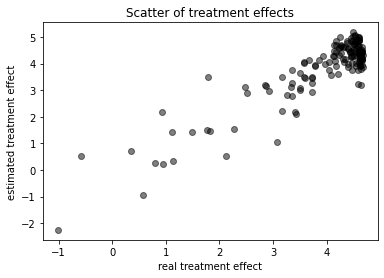

In [ ]:
import matplotlib.pyplot as plt
colors = (0,0,0)
# Plot
plt.scatter(test.np.ite, test_ite,  c=colors, alpha=0.5)
plt.title('Scatter of treatment effects')
plt.xlabel('real treatment effect')
plt.ylabel('estimated treatment effect')
plt.show()

## QUESTION 6

IS THE DRAGONNET NEURAL NETWORK ESTIMATING INDIVIDUAL TREATMENT EFFECTS WELL? IF YES/NO -WHY SO?

<div class="alert alert-block alert-warning">

- **'YES'** it is estimating it well as in general sense neural networks can estimate local distribution mappings quite effectively.

- However the effect is not uniform and the distributions aren't quite uniform on the lower side

- We see great improvement in **pehe_score** metric with less variance though

</div>

## 1.8 Comparison of the methods

In [ ]:
pd.concat([df_S_learner_LR, df_PSW_LR, df_S_learner_RF, df_T_learner_LR, df_T_learner_RF, df_causal_forest, df_dragonnet ], ignore_index=True)

,pehe_score-mean,pehe_score-median,pehe_score-std,mean_absolute-mean,mean_absolute-median,mean_absolute-std,method,train
0,5.633660,2.623297,8.362125,0.732443,0.238185,1.493276,S-Learner LR,True
1,5.625971,2.635993,8.213626,1.292668,0.396246,2.474603,S-Learner LR,False
2,5.595322,2.537818,8.244302,0.412006,0.284332,0.457697,PSW,True
3,6.837997,3.484394,8.323623,3.783440,2.649187,3.225824,PSW,False
4,3.133693,1.047904,4.861394,0.511598,0.125918,0.971366,S-Learner RF,True
5,3.320106,1.234456,5.197415,0.451143,0.137152,1.047357,S-Learner RF,False
6,3.106716,1.051650,4.788258,0.500543,0.124951,0.933657,T-Learner LR,True
7,3.311096,1.267110,5.155404,0.445728,0.134426,1.022285,T-Learner LR,False
8,1.783826,0.947208,2.263913,0.130565,0.104154,0.130342,T-Learner RF,True
9,2.512660,1.109184,3.501475,0.210897,0.123812,0.277706,T-Learner RF,False




```
# This is formatted as code
```

## QUESTION 7

HOW DO THE DIFFERENT MODELS COMPARE IN TERMS OF MEAN PEHE ACCURACY? WHAT ASPECTS DO YOU THINK DETERMINE WHETHER ONE MODEL PERFOMS BETTER THAN ANOTER?


<div class="alert alert-block alert-warning">

The following observations can be made on mean pehe accuracy and other aspects:

- Generally, T-Learner performs well in this case in comparision to S-learner owing to the fact that it uses a tree based method and get's two means to estimate upon

- We see more accuracy in RF based methods in comparision to LR based methods due to poor approximation by heterogeneity and variance function by LR

- Neural networks outperfoms in mean and another criterion named pehe_score-median depicting better generalization

- pehe_score-std however shows there exists some irregular distribution in data which is better expained in RF based methods both in train as well in non-train data

- Average treatment effect on individual treatment shows same findings what we found in pehe

</div>

 Let's see if there is any relation between **mean & pehe**

In [ ]:
df = pd.concat([df_S_learner_LR, df_PSW_LR, df_S_learner_RF, df_T_learner_LR, df_T_learner_RF, df_causal_forest, df_dragonnet ], ignore_index=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


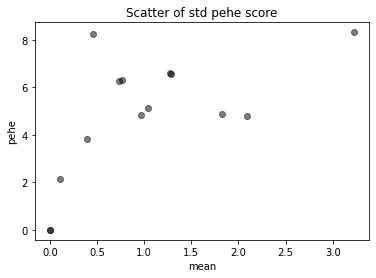

In [ ]:
import matplotlib.pyplot as plt
colors = (0,0,0)
# Plot
plt.scatter(df['mean_absolute-std'],df['pehe_score-std'],  c=colors, alpha=0.5)
plt.title('Scatter of std pehe score')
plt.xlabel('mean')
plt.ylabel('pehe')
plt.show()

It has somewhat increasing relationship in mean and pehe but in terms of evaluation pehe score justifies the story

***** References*****

Strong inspiration and understanding has been taken from this [source](https://justcause.readthedocs.io/en/latest/_downloads/e054f7a0fc9cf9e680173600cb4b4350/thesis-mfranz.pdf)
